## 센서가 사람의 활동을 얼마나 정확하게 맞추는가

- 데이터의 탐색적 분석실행<br>
- 데이터 전처리 실행<br>
- 모형을 최적화(하이퍼파라미터 튜닝) -> 내가 원하는 알고리즘으로 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

### Read in data
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [2]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')     

In [3]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [4]:
df.shape

(19622, 160)

In [5]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

In [6]:
df.head()  #classe가 명목형 변수임을 확인해봄

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


### 1) EDA실행, 결측치 처리

반응변수 classe는 결측치가 많으니 결측치 처리

In [7]:
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


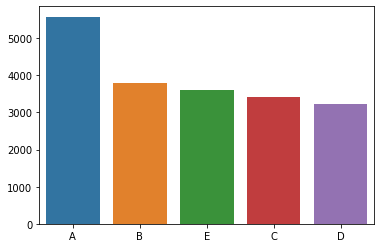

In [8]:
#반응변수에 몇가지 유형이 있고 어떻게 분포되어있는지 확인
freqs = df.classe.value_counts()
sns.barplot(freqs.index, freqs.values,ci=None)
plt.show()

In [9]:
#세로방향으로 결측치 평균을 확인
pd.isnull(df).mean(axis=0)  

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
                       ... 
accel_forearm_z         0.0
magnet_forearm_x        0.0
magnet_forearm_y        0.0
magnet_forearm_z        0.0
classe                  0.0
Length: 160, dtype: float64

### 2) 결측값이 97%이상인 열은 제거<br>

In [ ]:
isnotZero  #True는 결측치 의미(결측치 확인위함)

In [11]:
#결측값이 97% 미만인 열만 유지
isnotZero = np.array(pd.isnull(df).mean(axis=0) < 0.97)    #97%이상이 결측치인 경우(True)니 97%미만(False)인 것들만 가져옴 
df = df.loc[:, isnotZero]

In [12]:
#결측치 없는 것 확인
pd.isnull(df).mean(axis=0)

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
new_window              0.0
num_window              0.0
roll_belt               0.0
pitch_belt              0.0
yaw_belt                0.0
total_accel_belt        0.0
gyros_belt_x            0.0
gyros_belt_y            0.0
gyros_belt_z            0.0
accel_belt_x            0.0
accel_belt_y            0.0
accel_belt_z            0.0
magnet_belt_x           0.0
magnet_belt_y           0.0
magnet_belt_z           0.0
roll_arm                0.0
pitch_arm               0.0
yaw_arm                 0.0
total_accel_arm         0.0
gyros_arm_x             0.0
gyros_arm_y             0.0
gyros_arm_z             0.0
accel_arm_x             0.0
accel_arm_y             0.0
accel_arm_z             0.0
magnet_arm_x            0.0
magnet_arm_y            0.0
magnet_arm_z            0.0
roll_dumbbell           0.0
pitch_dumbbell          0.0
yaw_dumbbell        

In [13]:
df.shape  #열이 160개에서 60개로 축소됨

(19622, 60)

### 3) 불필요한 열 제거

time열 필요없으니 제거

In [14]:
#time 열 제거
header =df.columns    #열 이름(헤더) 가져옴
isnotTime = []
for col in header:    #열 이름(헤더) 리스트에서 time이 있으면 False, 없으면 True
    if "time" in col:  
        isnotTime.append(False)
    else:
        isnotTime.append(True)
df = df.loc[:, isnotTime]  #리스트 만듬: 나중에 fancy indexing하기 위해

#불필요한 열 추가 제거
df = df.drop(columns = ['Unnamed: 0','user_name','new_window'])
print(df.shape)
df.head(5)

#어떤 변수는 숫자가 200대고 어떤 변수는 0.02으로너무 차이나서 MinMaxScaler해줘야 함

(19622, 54)


,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


### 4) 응답변수 Label encode하기

LabelEncoder써서 응답변수를 전처리

In [15]:
X = np.array(df.drop(columns='classe'))    #X: classe 제외한 나머지 
Y = np.array(df.loc[:,'classe'])           #Y: classe 
LE = preprocessing.LabelEncoder() 
#반응변수가 명목형이라 머신러닝에 그대로 사용 불가: 레이블인코딩 or 더미변수화 해야함
#반응변수라 굳이 더미변수 쓸 필요 없음: 123456 되있어도 숫자로 인지할 필요가 없음 (같으냐 다르냐로 정확도 계산할거라서)
Y = LE.fit_transform(Y)

### 5) 설명변수 min-max scaling 실행

MinMaxScaler (x-m/max-min): 0~1사이로 값이 압축됨

In [16]:
scaler = preprocessing.MinMaxScaler() #scaler 객체만듬
X = scaler.fit_transform(X)           #x를 MinMaxScaler처리

#변수들의 수치를 비슷한 수치로 변경

### 6) 알고리즘 선택해 예측 분석 실시

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.<br><br>
특정 알고리즘 사용해 90%상위의 예측성능을 목표

In [17]:
#KNN 알고리즘 사용
k_grid = np.arange(1,11,1)    #k는 1~10까지
parameters = {'n_neighbors':k_grid}

In [ ]:
#k 하이퍼 파라미터 최적화
gridCV = GridrcSeahCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

#최적화 k는 1

In [ ]:
#최적화된 k값 넣어 계산  
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best KNN accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3))) 

#센서만 가지고 이 사람이 어떤 활동하는지 99% 맞출 수 있다 (매우 정확하다는 뜻)